In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
ps = np.linspace(0, 1, 201)

In [2]:
def gini(p):
    return 1 - (p**2 + (1 - p) ** 2)

def entropy(p):
    p = 1 - p
    if p in [0, 1]:
        return 0
    return -(
        p * np.log2(p) + 
        (1 - p) * np.log2(1 - p)
    )

gini_values = [gini(p) for p in ps]
entropy_values = [entropy(p) for p in ps]

In [3]:
max_gini_p = ps[np.argmax(gini_values)]
max_entropy_p = ps[np.argmax(entropy_values)]

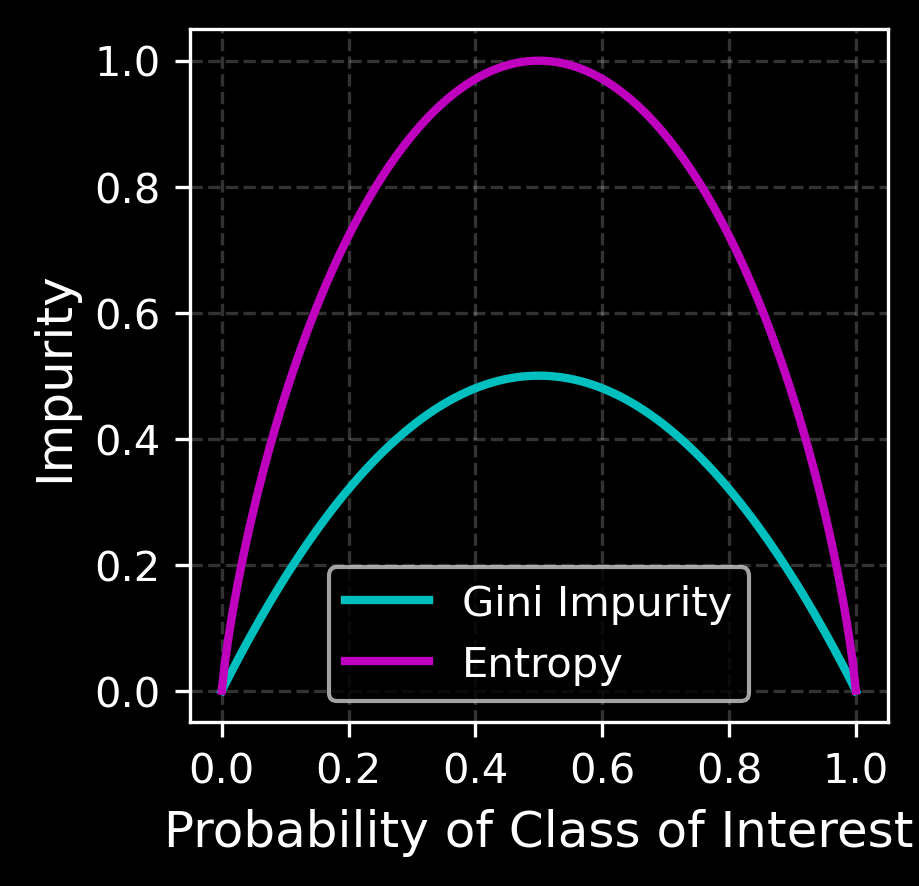

In [4]:
plt.figure(figsize=(3, 3), dpi=300)
plt.plot(ps, gini_values, label='Gini Impurity', c='c', linewidth=2)
plt.plot(ps, entropy_values, label='Entropy', c='m', linewidth=2)
plt.xticks(np.linspace(0, 1, 6))
plt.xlabel('Probability of Class of Interest', fontsize=12)
plt.ylabel('Impurity', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.2)

In [5]:
print(f"Gini maximum at p = {max_gini_p:.2f} (value: {max(gini_values):.1f})")
print(f"Entropy maximum at p = {max_entropy_p:.2f} (value: {max(entropy_values):.1f})")

Gini maximum at p = 0.50 (value: 0.5)
Entropy maximum at p = 0.50 (value: 1.0)


# Gini vs Entropy in Decision Trees

## Overview
Both Gini Impurity and Entropy are criteria used for splitting nodes in decision trees. 
While they often yield similar results, they differ in computational efficiency and bias towards class-imbalance.

## Formulas

### Gini Impurity
```python
G = 1 - (p₁² + p₂²)  # Binary classification
G = 1 - Σ(pᵢ²)      # Multi-class
```

Key characteristics:
- Uses basic arithmetic operations
- Computationally efficient
- Range: [0, 0.5] for binary classification
- Range: [0, 1 - 1/k] for k classes

### Entropy
```python
H = -p₁log₂(p₁) - p₂log₂(p₂)  # Binary classification
H = -Σ(pᵢlog₂(pᵢ))            # Multi-class
```

Logarithm calculation (Taylor series):
```python
ln(x) = (x-1) - (x-1)²/2 + (x-1)³/3 - (x-1)⁴/4 + ...
```

Key characteristics:
- Requires logarithm computation
- More computationally intensive
- Range: [0, 1] for binary classification
- Range: [0, log₂(k)] for k classes

## Comparison

### Computational Efficiency
- Gini: Fast due to simple arithmetic
- Entropy: Slower due to logarithm calculations

### Tree Properties
- Gini tends to:
  - Favor larger partitions
  - Be less sensitive to changes in node probabilities
  - Create slightly unbalanced trees
  
- Entropy tends to:
  - Create more balanced trees
  - Be more sensitive to changes in probability
  - Split nodes more evenly

### Example Calculation
For a node with 70% class A and 30% class B:

```python
# Gini
G = 1 - (0.7² + 0.3²) = 0.42

# Entropy
H = -(0.7 × log₂(0.7) + 0.3 × log₂(0.3)) = 0.88
```

## Practical Considerations

1. **Choice of Metric**
   - Both measures typically give similar results
   - Gini is often preferred for computational efficiency
   - Entropy might be better when balanced splits are crucial

2. **Implementation Impact**
   - Gini's faster computation becomes significant in:
     - Large datasets
     - Deep trees
     - Real-time applications
     - Limited computational resources

3. **Model Performance**
   - Final model accuracy usually similar
   - Tree structure may differ slightly
   - Choice between them rarely impacts overall performance significantly